<a href="https://colab.research.google.com/github/victornator25/Data-Science/blob/main/Tarea1_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data= pd.read_csv('GCB2022v27_MtCO2_flat.csv')
df=pd.DataFrame(data)
#para desplegar los nombres de las columnas del DataFrame
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Explorar el tipo de dato por columna
df.dtypes


Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [ ]:
#Para saber la distribucion de los NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
# conteo de NaN's por columnas
df.isna().sum(axis=0)

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [ ]:
# ¿De cuántos países diferentes hay datos?
from collections import Counter
paises=df['Country']
c=Counter(paises)
c


Counter({'Afghanistan': 272,
         'Albania': 272,
         'Algeria': 272,
         'Andorra': 272,
         'Angola': 272,
         'Anguilla': 272,
         'Antarctica': 272,
         'Antigua and Barbuda': 272,
         'Argentina': 272,
         'Armenia': 272,
         'Aruba': 272,
         'Australia': 272,
         'Austria': 272,
         'Azerbaijan': 272,
         'Bahamas': 272,
         'Bahrain': 272,
         'Bangladesh': 272,
         'Barbados': 272,
         'Belarus': 272,
         'Belgium': 272,
         'Belize': 272,
         'Benin': 272,
         'Bermuda': 272,
         'Bhutan': 272,
         'Bonaire, Saint Eustatius and Saba': 272,
         'Bosnia and Herzegovina': 272,
         'Botswana': 272,
         'Brazil': 272,
         'British Virgin Islands': 272,
         'Brunei Darussalam': 272,
         'Bulgaria': 272,
         'Burkina Faso': 272,
         'Burundi': 272,
         'Cambodia': 272,
         'Canada': 272,
         'Cape Verde': 272,
 

In [ ]:
paises.size

63104

In [ ]:
'''
si paises.size tiene un tamaño de 63104, pero no contamos a Global como país
y si cada país tiene 272 repeticiones en el tipo de dato paises, entonces
el total de paides diferentes es:
'''
Total_Paises=(paises.size-272)/272
Total_Paises

231.0

In [ ]:
# Hacemos un dataframe nuevo eliminando los NaN
df_new=df.dropna(axis=0, how='any')
#df_new.reset_index(inplace = True)

In [ ]:
#hacemos un solo DataFrame para México y para Global
import matplotlib.pyplot as plt

df_mex = df.loc[df['Country'] == 'Mexico']
df_mex.reset_index(inplace = True) #indexando desde 0



df_global = df.loc[df['Country'] == 'Global']
df_global.reset_index(inplace = True) #indexando desde 0



#plt.plot(df_mx['Year'], df_mx['Total'])


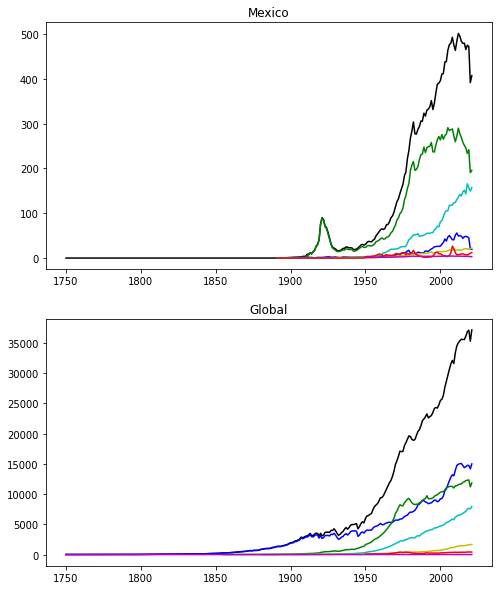

In [ ]:
#Graficar los valores globales y los de Mexico para: 'Total', 'Coal',
# 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'.

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8, 10))

ax0.set_title('Mexico')
ax0.plot(df_mex['Year'], df_mex['Total'], 'k', label='Total')
ax0.plot(df_mex['Year'], df_mex['Coal'], 'b', label='Coal')
ax0.plot(df_mex['Year'], df_mex['Oil'], 'g', label='Oil')
ax0.plot(df_mex['Year'], df_mex['Gas'], 'c', label='Gas')
ax0.plot(df_mex['Year'], df_mex['Cement'], 'y', label='Cement')
ax0.plot(df_mex['Year'], df_mex['Flaring'], 'r', label='Flaring')
ax0.plot(df_mex['Year'], df_mex['Per Capita'], 'm', label='Per Capita')

ax1.set_title('Global')
ax1.plot(df_global['Year'], df_global['Total'], 'k')
ax1.plot(df_global['Year'], df_global['Coal'], 'b')
ax1.plot(df_global['Year'], df_global['Oil'], 'g')
ax1.plot(df_global['Year'], df_global['Gas'], 'c')
ax1.plot(df_global['Year'], df_global['Cement'], 'y')
ax1.plot(df_global['Year'], df_global['Flaring'], 'r')
ax1.plot(df_global['Year'], df_global['Per Capita'], 'm')

plt.show()


In [ ]:
#Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior.
'''
El Grupo de los Veinte (G20) está integrado por 19 países 
(Alemania, Arabia Saudí, Argentina, Australia, Brasil, Canadá, China, Estados Unidos, Francia, India
Indonesia, Italia, Japón, Reino Unido, República de Corea, México, 
Rusia, Sudáfrica,Turquía) y la Unión Europea.
'''

g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany',
                 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia',
                 'South Africa', 'South Korea', 'Turkey', 'United Kingdom', 'USA']


def graficar_pais(DF,nombre):

  DF = df.loc[df['Country'] == nombre]
  plt.figure()
  plt.title(str(nombre))
  plt.plot(DF['Total'], 'k', label='Total')
  plt.plot(DF['Coal'], 'b', label='Coal')
  plt.plot(DF['Oil'], 'g', label='Oil')
  plt.plot(DF['Gas'], 'c', label='Gas')
  plt.plot( DF['Cement'], 'y', label='Cement')
  plt.plot( DF['Flaring'], 'r', label='Flaring')
  plt.plot( DF['Per Capita'], 'm', label='Per Capita')
  plt.legend()
  
  plt.show()



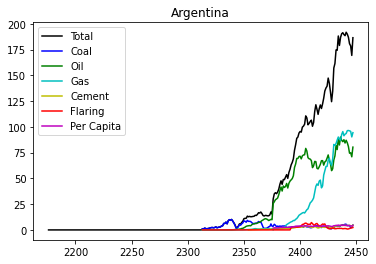

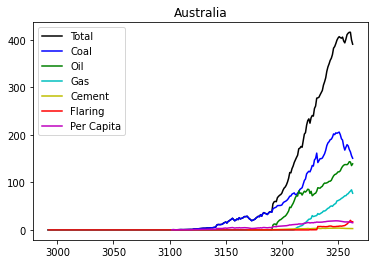

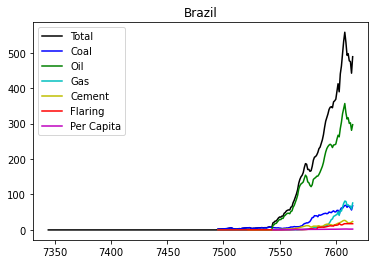

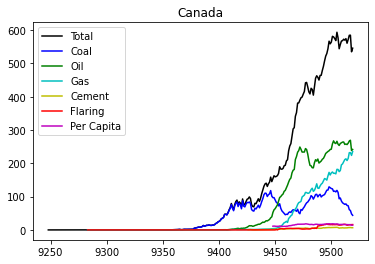

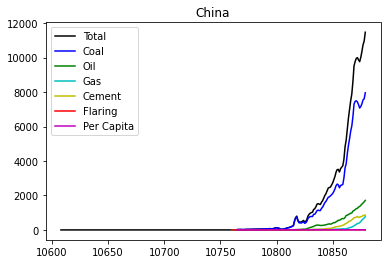

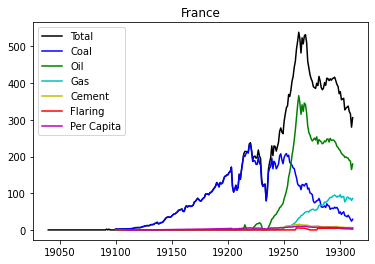

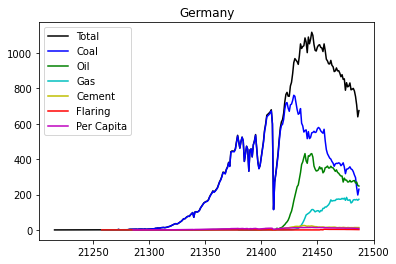

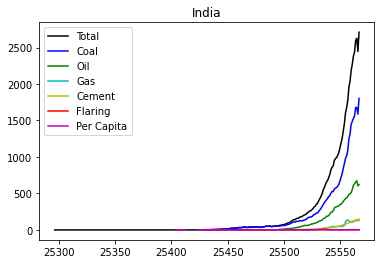

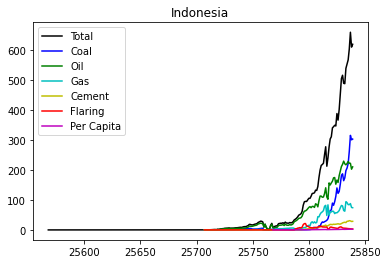

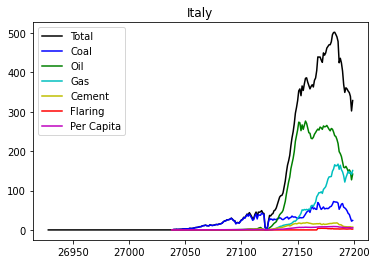

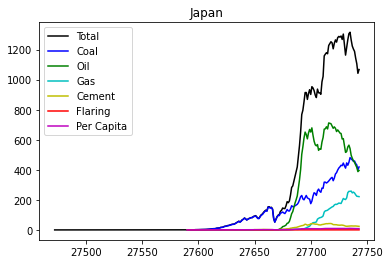

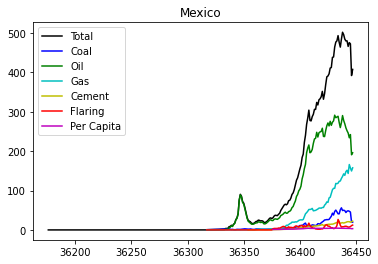

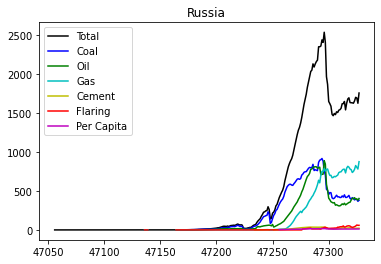

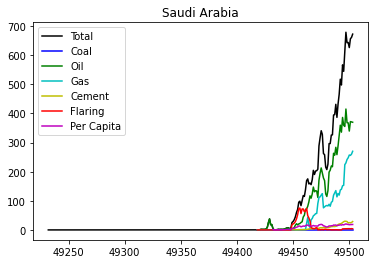

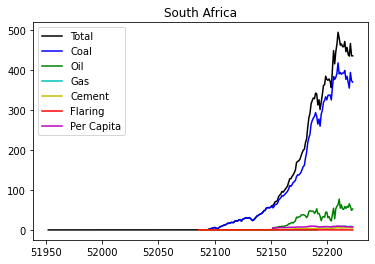

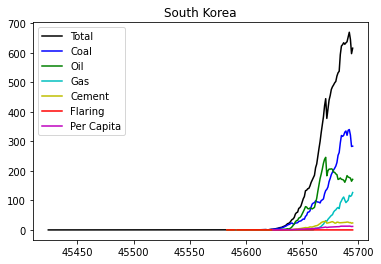

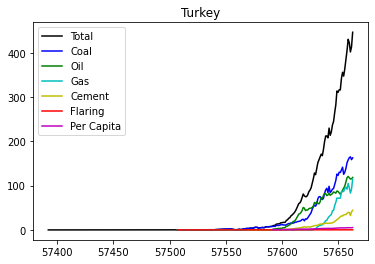

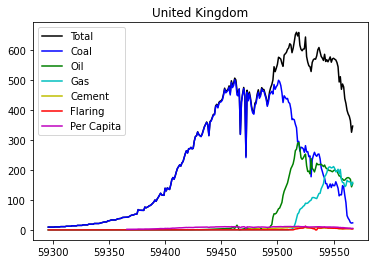

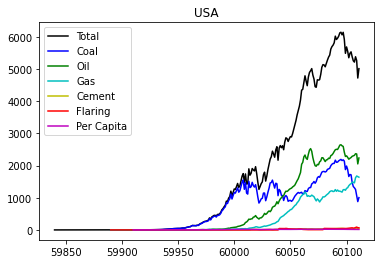

In [ ]:
#Graficar los del G20
for i in g20:
  graficar_pais(df, i)

In [ ]:
df_g20=pd.DataFrame()
'''
df1= df.loc[df['Country'] == g20[1]]
df2= df.loc[df['Country'] == g20[2]]
df_g20 = pd.concat([df1,df2], axis=0)
'''

for i in g20:
  df1 = df.loc[df['Country'] == i]
  df_g20 = pd.concat([df_g20, df1], axis=0)

In [ ]:
df_g20

,index,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
2176,2176,Argentina,ARG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,2177,Argentina,ARG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,2178,Argentina,ARG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,2179,Argentina,ARG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,2180,Argentina,ARG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60107,60107,USA,USA,2017,5210.957584,1308.479533,2314.675386,1460.391796,40.323535,59.245489,27.841845,15.800777
60108,60108,USA,USA,2018,5376.657233,1256.201494,2365.283480,1618.720337,38.970745,72.786925,24.694251,16.187923
60109,60109,USA,USA,2019,5259.143836,1070.723931,2358.831137,1673.999100,40.895869,88.383147,26.310652,15.730884
60110,60110,USA,USA,2020,4715.691109,878.972885,2049.336500,1653.677852,40.687747,67.684371,25.331754,14.037218


In [ ]:
#Considerando solo la emisión de los paises del G20, con que porcentaje contribuye México al Total y Per Capita?
def porcentaje_g20(DF, nombre):
   DF2 = df.loc[df['Country'] == nombre] 
   percent_Total= (100/sum(DF['Total']))*(sum(DF2['Total']))
   percent_Percapita= (100/sum(DF['Per Capita']))*(sum(DF2['Per Capita']))
   #print('El porcentaje que representa', nombre , 'en el total del G20 es ', percent_Total,'% Y Per Capita ' ,percent_Percapita,'%' )

#Para méxico en específico:
porcentaje_g20(df_g20, 'Mexico')


El porcentaje que representa Mexico en el total del G20 es  1.5468301899803316 % Y Per Capita  nan %


In [ ]:
#Cuales son los 3 países que más contaminan en cada uno de los casos?
def mas_contaminantes_g20(DF, nombres):
  totales=[]
  for i in nombres: 
    DF2 = df.loc[df['Country'] == i] 
    totales.append(sum(DF2['Total'])) #sumamos los totales

  primer=max(totales)
  posicion1 = totales.index(primer)

  totales2= [elemento for elemento in totales if elemento != primer]
  segundo=max(totales2)
  posicion2=totales.index(segundo)

  totales3= [elemento for elemento in totales2 if elemento != segundo]
  tercero=max(totales3)
  posicion3=totales.index(tercero)

  
  print('MAS CONTAMINANTES G20', '\n Primero', nombres[posicion1], 'Total=', primer,
        '\n Segundo',  nombres[posicion2], 'Total=', segundo,
        '\n Tercero',  nombres[posicion3], 'Total=', tercero,
        '\n \n suma acumulada desde que se tiene registro')

mas_contaminantes_g20(df_g20, g20)

MAS CONTAMINANTES G20 
 Primero USA Total= 421906.8552029998 
 Segundo China Total= 249352.81765999997 
 Tercero Russia Total= 117547.631435 
 
 suma acumulada desde que se tiene registro
